## Aquisição dos dados e definição do problema

In [1]:
import pandas as pd
import numpy as np
from scipy import special
import itertools
from datetime import timedelta
from IPython.display import display
import random

In [2]:
fraude_df = pd.read_csv('Fraud_Data.csv')

In [3]:
fraude_df

id             cadastro               compra  valor  \
0        22058  2015-02-24 22:55:49  2015-04-18 02:47:11     34   
1       333320  2015-06-07 20:39:50  2015-06-08 01:38:54     16   
2         1359  2015-01-01 18:52:44  2015-01-01 18:52:45     15   
3       150084  2015-04-28 21:13:25  2015-05-04 13:54:50     44   
4       221365  2015-07-21 07:09:52  2015-09-09 18:40:53     39   
...        ...                  ...                  ...    ...   
151107  345170  2015-01-27 03:03:34  2015-03-29 00:30:47     43   
151108  274471  2015-05-15 17:43:29  2015-05-26 12:24:39     35   
151109  368416  2015-03-03 23:07:31  2015-05-20 07:07:47     40   
151110  207709  2015-07-09 20:06:07  2015-09-07 09:34:46     46   
151111  138208  2015-06-10 07:02:20  2015-07-21 02:03:53     20   

       id_dispositivo   fonte browser genero  idade            ip  fraude  
0       QVPSPJUOCKZAR     SEO  Chrome      M     39  7.327584e+08       0  
1       EOGFQPIZPYXFZ     Ads  Chrome      F     53  3.503114e+08       0  
2       YSSKYOSJHPPLJ     SEO   Opera      M     53  2.621474e+09       1  
3       ATGTXKYKUDUQN     SEO  Safari      M     41  3.840542e+09       0  
4       NAUITBZFJKHWW     Ads  Safari      M     45  4.155831e+08       0  
...               ...     ...     ...    ...    ...           ...     ...  
151107  XPSKTWGPWINLR     SEO  Chrome      M     28  3.451155e+09       1  
151108  LYSFABUCPCGBA     SEO  Safari      M     32  2.439047e+09       0  
151109  MEQHCSJUBRBFE     SEO      IE      F     26  2.748471e+09       0  
151110  CMCXFGRHYSTVJ     SEO  Chrome      M     37  3.601175e+09       0  
151111  ZINIADFCLHYPG  Direct      IE      M     38  4.103825e+09       0  

[151112 rows x 11 columns]

In [4]:
ISP_df = pd.read_csv('ipAddress_to_Country.csv')

In [5]:
ISP_df

limite_inferior_ip  limite_superior_ip       pais
0             1.677722e+07            16777471  Australia
1             1.677747e+07            16777727      China
2             1.677773e+07            16778239      China
3             1.677824e+07            16779263  Australia
4             1.677926e+07            16781311      China
...                    ...                 ...        ...
138841        3.758092e+09          3758093311  Hong Kong
138842        3.758093e+09          3758094335      India
138843        3.758095e+09          3758095871      China
138844        3.758096e+09          3758096127  Singapore
138845        3.758096e+09          3758096383  Australia

[138846 rows x 3 columns]

In [6]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              151112 non-null  int64  
 1   cadastro        151112 non-null  object 
 2   compra          151112 non-null  object 
 3   valor           151112 non-null  int64  
 4   id_dispositivo  151112 non-null  object 
 5   fonte           151112 non-null  object 
 6   browser         151112 non-null  object 
 7   genero          151112 non-null  object 
 8   idade           151112 non-null  int64  
 9   ip              151112 non-null  float64
 10  fraude          151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
fraude_df.describe()

id          valor          idade            ip  \
count  151112.000000  151112.000000  151112.000000  1.511120e+05   
mean   200171.040970      36.935372      33.140704  2.152145e+09   
std    115369.285024      18.322762       8.617733  1.248497e+09   
min         2.000000       9.000000      18.000000  5.209350e+04   
25%    100642.500000      22.000000      27.000000  1.085934e+09   
50%    199958.000000      35.000000      33.000000  2.154770e+09   
75%    300054.000000      49.000000      39.000000  3.243258e+09   
max    400000.000000     154.000000      76.000000  4.294850e+09   

              fraude  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [8]:
ISP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   limite_inferior_ip  138846 non-null  float64
 1   limite_superior_ip  138846 non-null  int64  
 2   pais                138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
ip_floats = ISP_df.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


In [10]:
ISP_df.limite_inferior_ip = ISP_df.limite_inferior_ip.astype(np.int64)

In [11]:
ISP_df.describe()

limite_inferior_ip  limite_superior_ip
count        1.388460e+05        1.388460e+05
mean         2.724532e+09        2.724557e+09
std          8.975215e+08        8.974979e+08
min          1.677722e+07        1.677747e+07
25%          1.919930e+09        1.920008e+09
50%          3.230887e+09        3.230888e+09
75%          3.350465e+09        3.350466e+09
max          3.758096e+09        3.758096e+09

In [12]:
def isp_counts(isp):
    pais = ISP_df[(ISP_df.limite_inferior_ip <= isp) & (ISP_df.limite_superior_ip >= isp)].pais
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ISP_df.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ISP_df.limite_inferior_ip.min():
            return print("Muito pequeno")
        else:
            return print("Faltando")

ip_counts = fraude_df.ip.apply(isp_counts)
ip_counts.value_counts()

Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Úni

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único


Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito gra

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Ú

Único
Único
Único
Único
Único
Único
Único
Faltando
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ú

Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Mu

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Mu

Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Ún

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grand

Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito gran

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único

Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único


Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande


Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
M

Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Único
Faltando
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande


Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltand

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Muito pequeno
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único


Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Ú

Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Únic

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único

Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Muito

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Únic

Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito g

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Únic

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Faltando
Muito grande
Único
Único
Único
Faltando
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Muito grande
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Faltando
Único
Muito grande
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito pequeno
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito pequeno
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único


Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito gran

Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Úni

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Falt

Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande


Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único


Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único


Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Muito

Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Únic

Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único

Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ún

Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ú

Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ú

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito g

Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Ún

Muito grande
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande

Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Faltando
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muit

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ún

Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único


Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Ún

Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único


Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Ú

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Ún

Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Faltando
Único
Faltando
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único

Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Mui

Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Ún

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande


Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Faltando
Muito grande
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Ú

Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande

Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Únic

Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Faltando
Único
Único
Único
Ú

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Muito pequeno
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Muit

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Faltando
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Faltando
Único
Únic

Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Faltando
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Ú

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Ú

Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
M

Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Únic

Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Úni

Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Faltando
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Muito grande
Muito grande
Mu

Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Únic

Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito gra

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Ú

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Únic

Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Faltando
Único
Muito grande
Muito grande
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Faltando
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Ún

Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Faltando
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ú

Único
Único
Único
Único
Único
Único
Faltando
Único
Muito grande
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Muito grande
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único

Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Faltando
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Ún

Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único


Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único

Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito grande
Único
Único
Muito grande
Único
Único
Único
Muito grande
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Úni

Series([], Name: ip, dtype: int64)

In [13]:
def ip_para_pais(ip):
    tmp = ISP_df[(ISP_df.limite_inferior_ip <= ip)
            & (ISP_df.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraude_df["pais"] = fraude_df.ip.apply(ip_para_pais)

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
F

In [14]:
fraude_df.head()

id             cadastro               compra  valor id_dispositivo  \
0   22058  2015-02-24 22:55:49  2015-04-18 02:47:11     34  QVPSPJUOCKZAR   
1  333320  2015-06-07 20:39:50  2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   
2    1359  2015-01-01 18:52:44  2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   
3  150084  2015-04-28 21:13:25  2015-05-04 13:54:50     44  ATGTXKYKUDUQN   
4  221365  2015-07-21 07:09:52  2015-09-09 18:40:53     39  NAUITBZFJKHWW   

  fonte browser genero  idade            ip  fraude           pais  
0   SEO  Chrome      M     39  7.327584e+08       0          Japan  
1   Ads  Chrome      F     53  3.503114e+08       0  United States  
2   SEO   Opera      M     53  2.621474e+09       1  United States  
3   SEO  Safari      M     41  3.840542e+09       0           None  
4   Ads  Safari      M     45  4.155831e+08       0  United States

In [15]:
fraude_df['pais'].value_counts()

United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
                     ...  
Myanmar                  1
Vanuatu                  1
Dominica                 1
Niger                    1
Guadeloupe               1
Name: pais, Length: 181, dtype: int64

## Análise exploratória

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Qtde casos')

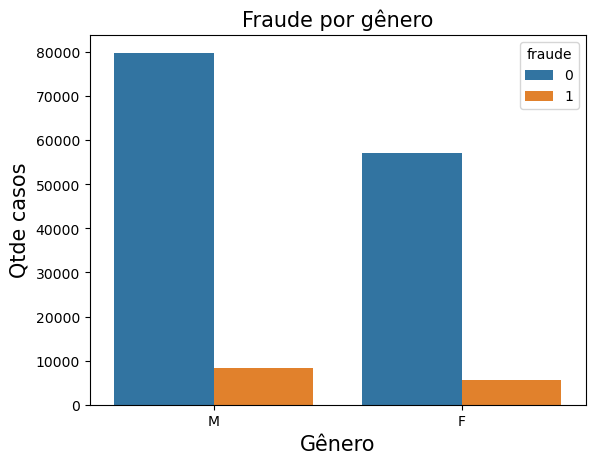

In [17]:
sns.countplot(x='genero', hue='fraude', data=fraude_df)
plt.title('Fraude por gênero', fontsize=15)
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Qtde casos', fontsize=15)

Text(0, 0.5, 'Valor de compra')

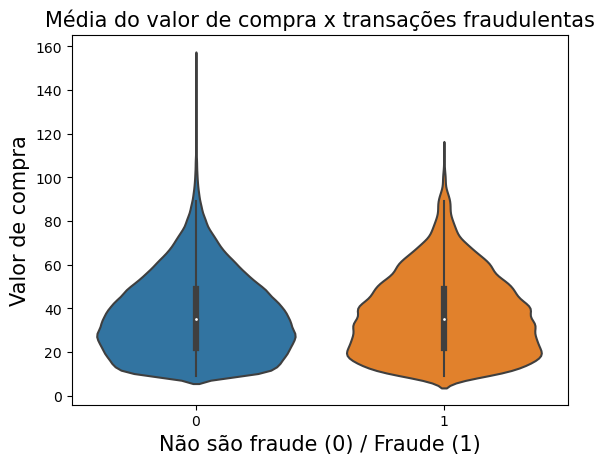

In [18]:
sns.violinplot(x="fraude", y="valor", data=fraude_df)
plt.title('Média do valor de compra x transações fraudulentas', fontsize=15)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

Text(0, 0.5, 'Idade')

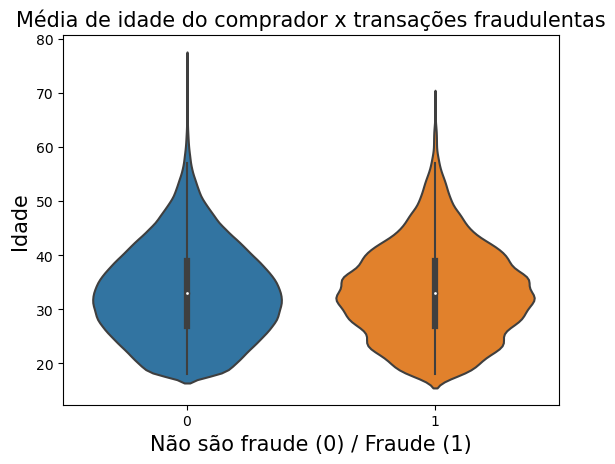

In [19]:
sns.violinplot(x="fraude", y="idade", data=fraude_df)
plt.title('Média de idade do comprador x transações fraudulentas', fontsize=15)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade", fontsize=15)

Text(0, 0.5, 'Qtde casos')

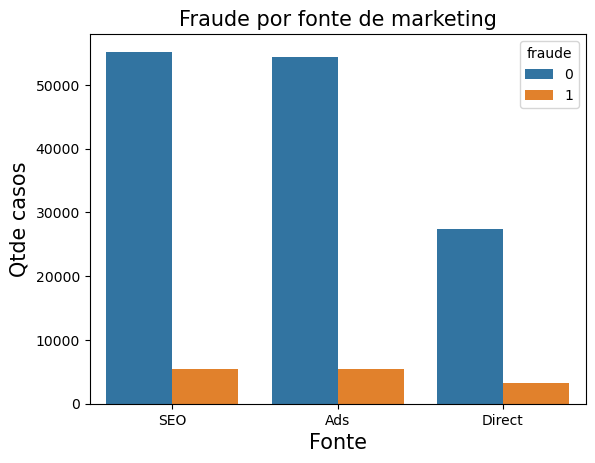

In [20]:
sns.countplot(x='fonte', hue='fraude', data=fraude_df)
plt.title('Fraude por fonte de marketing', fontsize=15)
plt.xlabel('Fonte', fontsize=15)
plt.ylabel('Qtde casos', fontsize=15)

In [21]:
sums_f = fraude_df[fraude_df["fraude"] == 1]["fraude"].groupby(fraude_df.pais).sum()
sums_f = sums_f.to_frame().reset_index()

sums_nf = fraude_df[fraude_df["fraude"] == 0]["fraude"].groupby(fraude_df.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Text(0.5, 1.0, 'Fraudes por países')

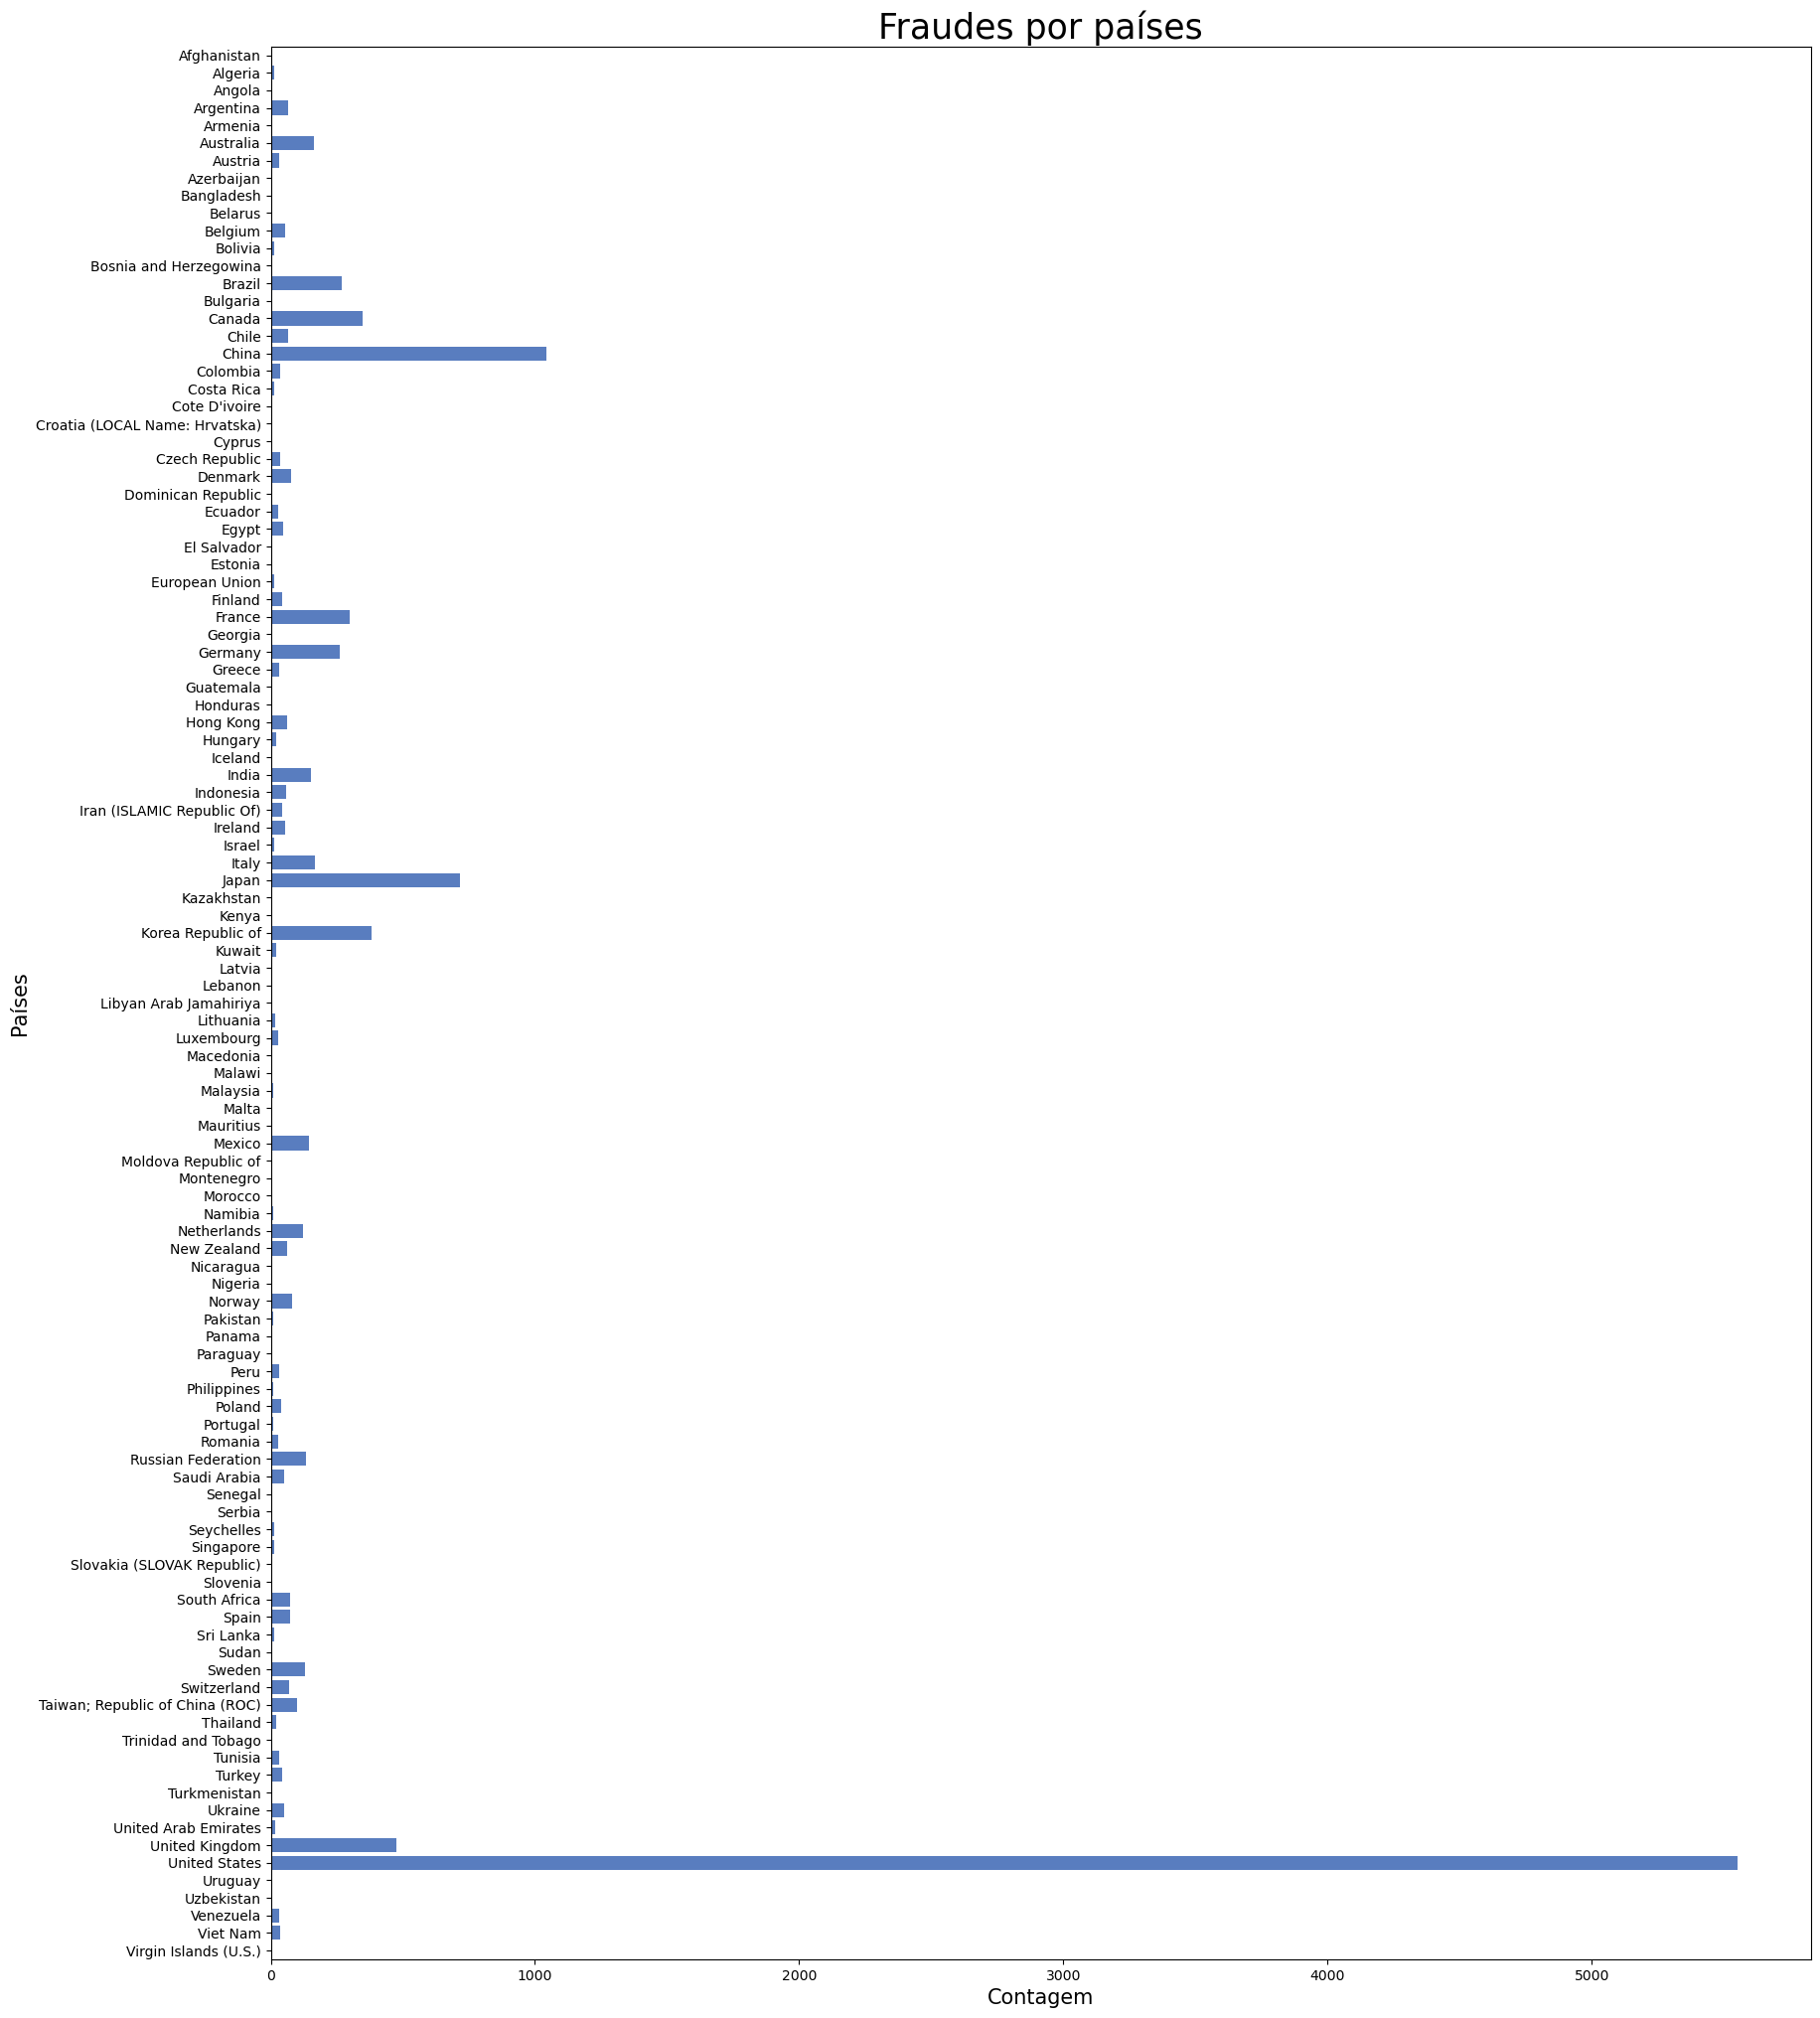

In [22]:
f, ax = plt.subplots(figsize=(20,25))
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f, label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)
plt.title('Fraudes por países', fontsize=25)

In [23]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraude_df["fraude"]

userid_count = fraude_df.groupby("id_dispositivo").id.count()
tmp_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby("ip").id.count()
tmp_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count2[x])

Text(0, 0.5, 'ID de usuário por dispositivo')

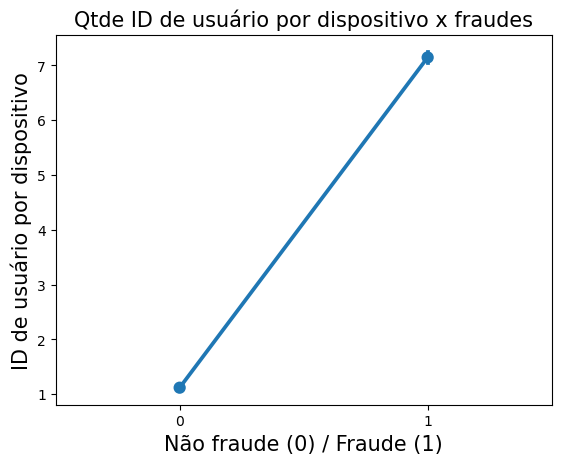

In [24]:
sns.pointplot(x="fraude", y="id_por_dispositivo", data=tmp_df)
plt.title('Qtde ID de usuário por dispositivo x fraudes', fontsize=15)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)

Text(0, 0.5, 'ID de usuário por endereço IP')

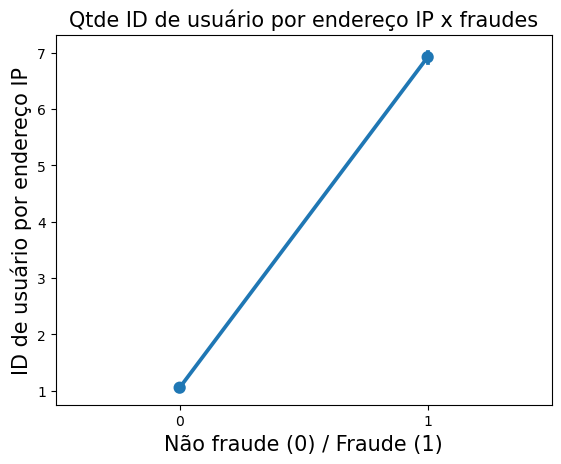

In [25]:
sns.pointplot(x="fraude", y="id_por_ip", data=tmp_df)
plt.title('Qtde ID de usuário por endereço IP x fraudes', fontsize=15)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)

In [26]:
tmp_df["cadastro"] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraude_df.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

Text(0, 0.5, 'Tempo entre início e compra (segundos)')

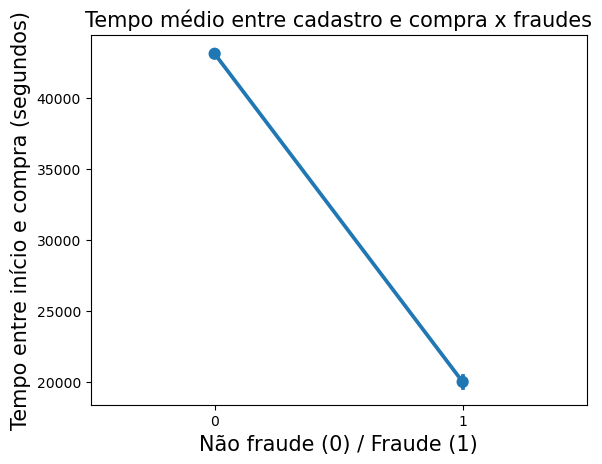

In [27]:
sns.pointplot(x="fraude", y="tempo", data=tmp_df)
plt.title("Tempo médio entre cadastro e compra x fraudes", fontsize=15)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

In [28]:
tmp_df.head()

fraude  id_por_dispositivo  id_por_ip            cadastro  \
0       0                   1          1 2015-02-24 22:55:49   
1       0                   1          1 2015-06-07 20:39:50   
2       1                  12         12 2015-01-01 18:52:44   
3       0                   1          1 2015-04-28 21:13:25   
4       0                   1          1 2015-07-21 07:09:52   

               compra  tempo  
0 2015-04-18 02:47:11  13882  
1 2015-06-08 01:38:54  17944  
2 2015-01-01 18:52:45      1  
3 2015-05-04 13:54:50  60085  
4 2015-09-09 18:40:53  41461

Text(0, 0.5, 'Contagem')

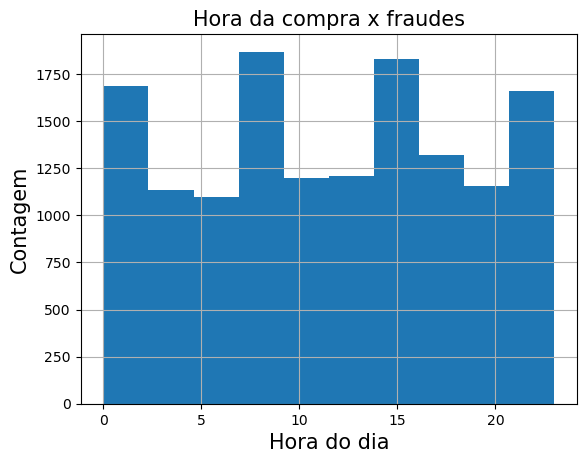

In [29]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.title("Hora da compra x fraudes", fontsize=15)
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Text(0, 0.5, 'Contagem')

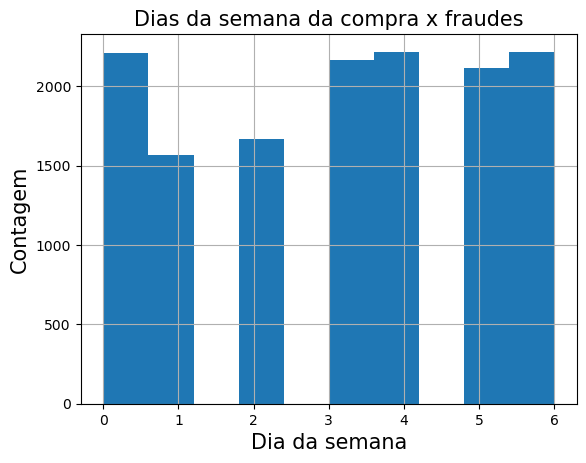

In [30]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.title("Dias da semana da compra x fraudes", fontsize=15)
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Text(0, 0.5, 'Contagem')

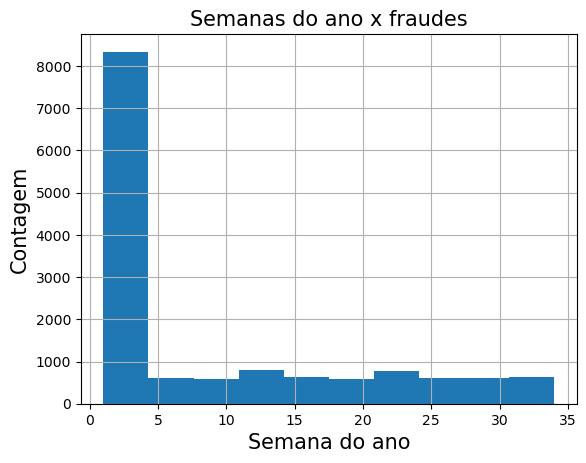

In [31]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.title("Semanas do ano x fraudes", fontsize=15)
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

## Feature engineering

In [32]:
userid_count3 = fraude_df.groupby("id_dispositivo").id.count()
fraude_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count3[x])

fraude_df.head()

id             cadastro               compra  valor id_dispositivo  \
0   22058  2015-02-24 22:55:49  2015-04-18 02:47:11     34  QVPSPJUOCKZAR   
1  333320  2015-06-07 20:39:50  2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   
2    1359  2015-01-01 18:52:44  2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   
3  150084  2015-04-28 21:13:25  2015-05-04 13:54:50     44  ATGTXKYKUDUQN   
4  221365  2015-07-21 07:09:52  2015-09-09 18:40:53     39  NAUITBZFJKHWW   

  fonte browser genero  idade            ip  fraude           pais  \
0   SEO  Chrome      M     39  7.327584e+08       0          Japan   
1   Ads  Chrome      F     53  3.503114e+08       0  United States   
2   SEO   Opera      M     53  2.621474e+09       1  United States   
3   SEO  Safari      M     41  3.840542e+09       0           None   
4   Ads  Safari      M     45  4.155831e+08       0  United States   

   id_por_dispositivo  
0                   1  
1                   1  
2                  12  
3                   1  
4                   1

In [33]:
userid_count4 = fraude_df.groupby("ip").id.count()
fraude_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count4[x])

fraude_df.head()

id             cadastro               compra  valor id_dispositivo  \
0   22058  2015-02-24 22:55:49  2015-04-18 02:47:11     34  QVPSPJUOCKZAR   
1  333320  2015-06-07 20:39:50  2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   
2    1359  2015-01-01 18:52:44  2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   
3  150084  2015-04-28 21:13:25  2015-05-04 13:54:50     44  ATGTXKYKUDUQN   
4  221365  2015-07-21 07:09:52  2015-09-09 18:40:53     39  NAUITBZFJKHWW   

  fonte browser genero  idade            ip  fraude           pais  \
0   SEO  Chrome      M     39  7.327584e+08       0          Japan   
1   Ads  Chrome      F     53  3.503114e+08       0  United States   
2   SEO   Opera      M     53  2.621474e+09       1  United States   
3   SEO  Safari      M     41  3.840542e+09       0           None   
4   Ads  Safari      M     45  4.155831e+08       0  United States   

   id_por_dispositivo  id_por_ip  
0                   1          1  
1                   1          1  
2                  12         12  
3                   1          1  
4                   1          1

In [34]:
fraude_df["media_id"] = (fraude_df.id_por_dispositivo + fraude_df.id_por_ip) * 0.5

fraude_df.head()

id             cadastro               compra  valor id_dispositivo  \
0   22058  2015-02-24 22:55:49  2015-04-18 02:47:11     34  QVPSPJUOCKZAR   
1  333320  2015-06-07 20:39:50  2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   
2    1359  2015-01-01 18:52:44  2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   
3  150084  2015-04-28 21:13:25  2015-05-04 13:54:50     44  ATGTXKYKUDUQN   
4  221365  2015-07-21 07:09:52  2015-09-09 18:40:53     39  NAUITBZFJKHWW   

  fonte browser genero  idade            ip  fraude           pais  \
0   SEO  Chrome      M     39  7.327584e+08       0          Japan   
1   Ads  Chrome      F     53  3.503114e+08       0  United States   
2   SEO   Opera      M     53  2.621474e+09       1  United States   
3   SEO  Safari      M     41  3.840542e+09       0           None   
4   Ads  Safari      M     45  4.155831e+08       0  United States   

   id_por_dispositivo  id_por_ip  media_id  
0                   1          1       1.0  
1                   1          1       1.0  
2                  12         12      12.0  
3                   1          1       1.0  
4                   1          1       1.0

In [35]:
fraude_df.cadastro = fraude_df.cadastro.apply(pd.to_datetime)
fraude_df.compra = fraude_df.compra.apply(pd.to_datetime)
fraude_df["tempo"] = (fraude_df.compra - fraude_df.cadastro).apply(lambda x: x.seconds)

fraude_df.head()

id            cadastro              compra  valor id_dispositivo fonte  \
0   22058 2015-02-24 22:55:49 2015-04-18 02:47:11     34  QVPSPJUOCKZAR   SEO   
1  333320 2015-06-07 20:39:50 2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   Ads   
2    1359 2015-01-01 18:52:44 2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   SEO   
3  150084 2015-04-28 21:13:25 2015-05-04 13:54:50     44  ATGTXKYKUDUQN   SEO   
4  221365 2015-07-21 07:09:52 2015-09-09 18:40:53     39  NAUITBZFJKHWW   Ads   

  browser genero  idade            ip  fraude           pais  \
0  Chrome      M     39  7.327584e+08       0          Japan   
1  Chrome      F     53  3.503114e+08       0  United States   
2   Opera      M     53  2.621474e+09       1  United States   
3  Safari      M     41  3.840542e+09       0           None   
4  Safari      M     45  4.155831e+08       0  United States   

   id_por_dispositivo  id_por_ip  media_id  tempo  
0                   1          1       1.0  13882  
1                   1          1       1.0  17944  
2                  12         12      12.0      1  
3                   1          1       1.0  60085  
4                   1          1       1.0  41461

In [36]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix='pais')
fraude_df = pd.concat([fraude_df, pais_dummies], axis=1)

fraude_df.head()

id            cadastro              compra  valor id_dispositivo fonte  \
0   22058 2015-02-24 22:55:49 2015-04-18 02:47:11     34  QVPSPJUOCKZAR   SEO   
1  333320 2015-06-07 20:39:50 2015-06-08 01:38:54     16  EOGFQPIZPYXFZ   Ads   
2    1359 2015-01-01 18:52:44 2015-01-01 18:52:45     15  YSSKYOSJHPPLJ   SEO   
3  150084 2015-04-28 21:13:25 2015-05-04 13:54:50     44  ATGTXKYKUDUQN   SEO   
4  221365 2015-07-21 07:09:52 2015-09-09 18:40:53     39  NAUITBZFJKHWW   Ads   

  browser genero  idade            ip  ...  pais_United States pais_Uruguay  \
0  Chrome      M     39  7.327584e+08  ...                   0            0   
1  Chrome      F     53  3.503114e+08  ...                   1            0   
2   Opera      M     53  2.621474e+09  ...                   1            0   
3  Safari      M     41  3.840542e+09  ...                   0            0   
4  Safari      M     45  4.155831e+08  ...                   1            0   

   pais_Uzbekistan  pais_Vanuatu  pais_Venezuela  pais_Viet Nam  \
0                0             0               0              0   
1                0             0               0              0   
2                0             0               0              0   
3                0             0               0              0   
4                0             0               0              0   

   pais_Virgin Islands (U.S.)  pais_Yemen  pais_Zambia  pais_Zimbabwe  
0                           0           0            0              0  
1                           0           0            0              0  
2                           0           0            0              0  
3                           0           0            0              0  
4                           0           0            0              0  

[5 rows x 197 columns]

In [37]:
fraude_df.drop(["id",
                "cadastro",
                "compra",
                "id_dispositivo",
                "ip",
                "id_por_dispositivo",
                "id_por_ip",
                "pais",
                "fonte",
                "browser",
                "genero",
                "idade",
                "valor"], axis=1, inplace = True)

In [38]:
fraude_df.head()

fraude  media_id  tempo  pais_Afghanistan  pais_Albania  pais_Algeria  \
0       0       1.0  13882                 0             0             0   
1       0       1.0  17944                 0             0             0   
2       1      12.0      1                 0             0             0   
3       0       1.0  60085                 0             0             0   
4       0       1.0  41461                 0             0             0   

   pais_Angola  pais_Antigua and Barbuda  pais_Argentina  pais_Armenia  ...  \
0            0                         0               0             0  ...   
1            0                         0               0             0  ...   
2            0                         0               0             0  ...   
3            0                         0               0             0  ...   
4            0                         0               0             0  ...   

   pais_United States  pais_Uruguay  pais_Uzbekistan  pais_Vanuatu  \
0                   0             0                0             0   
1                   1             0                0             0   
2                   1             0                0             0   
3                   0             0                0             0   
4                   1             0                0             0   

   pais_Venezuela  pais_Viet Nam  pais_Virgin Islands (U.S.)  pais_Yemen  \
0               0              0                           0           0   
1               0              0                           0           0   
2               0              0                           0           0   
3               0              0                           0           0   
4               0              0                           0           0   

   pais_Zambia  pais_Zimbabwe  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 184 columns]

Text(0, 0.5, 'Contagem normalizada')

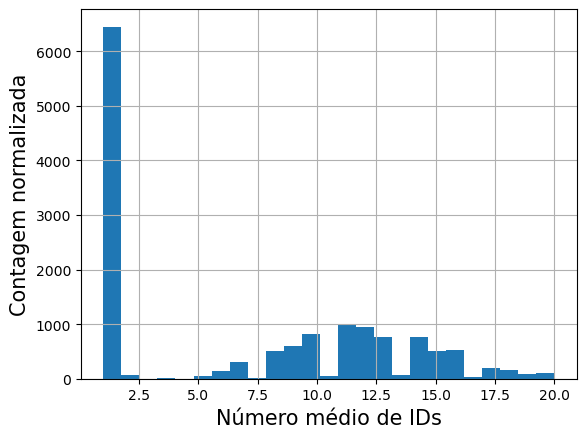

In [39]:
fraude_df[fraude_df["fraude"] == 1].media_id.hist(bins=25)
plt.xlabel("Número médio de IDs", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

Text(0, 0.5, 'Contagem normalizada')

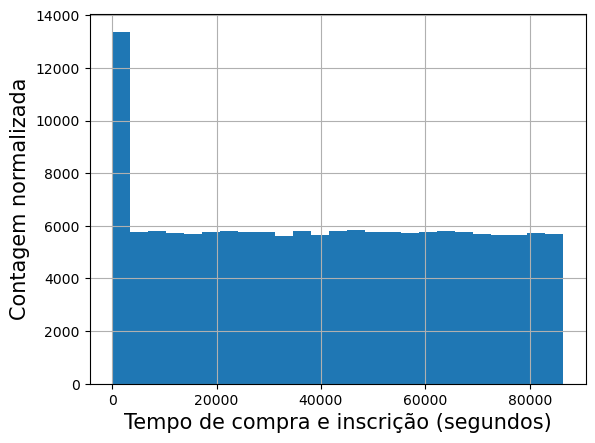

In [40]:
fraude_df.tempo.hist(bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

In [41]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Text(0, 0.5, 'Contagem normalizada')

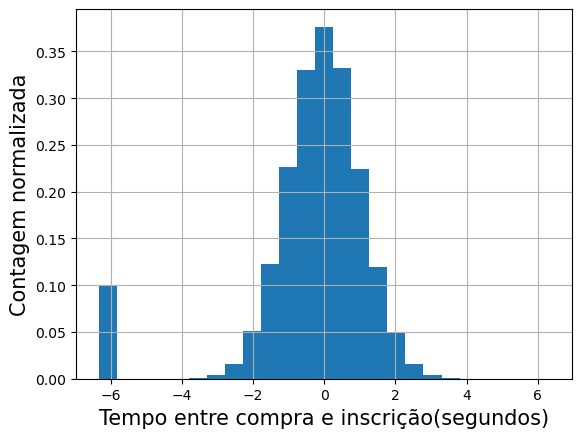

In [42]:
fraude_df["tempo"] = rescale_series(fraude_df.tempo)
fraude_df.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

In [43]:
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

onehotencoded = [feature for feature in fraude_df.columns if "pais" not in feature and feature != "fraude"]

for col in onehotencoded:
    fraude_df[col] = rescale_series(fraude_df[col])

    X = fraude_df[ [col for col in fraude_df.columns if col != "fraude"]]
    Y = fraude_df["fraude"]

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
clf = ExtraTreesClassifier()
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

features [features.importancia > np.mean(features.importancia)].sort_values(by="importancia", ascending=False)

feature  importancia
1     tempo     0.714437
0  media_id     0.279795

## Criando modelos preditivos

In [46]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import f1_score

### Algoritmo supervisionado 1 - Floresta de Isolamento

In [47]:
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, train_size = 0.75, random_state = 23)
Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

In [48]:
IF = IsolationForest(max_samples="auto", contamination = 0.095, random_state=1)
param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500]}

clf = GridSearchCV(IF,
                param_grid,
                cv=5,
                n_jobs=10,
                scoring="f1",
                verbose=10)

_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


              precision    recall  f1-score   support

     anomalo       0.48      0.48      0.48      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.71      0.71      0.71     37778
weighted avg       0.90      0.90      0.90     37778

Area sob a curva ROC: {:0, 3f} 0.7115178509877922


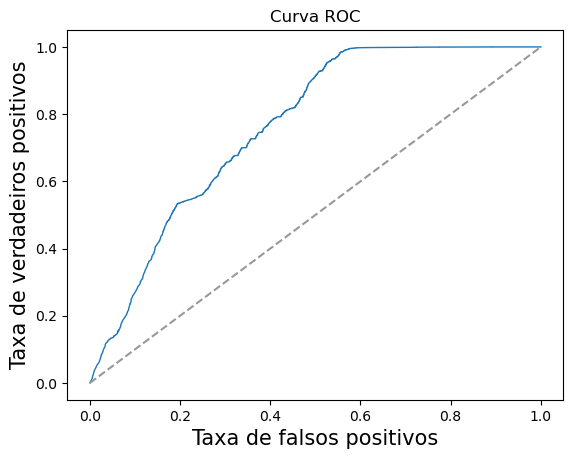

In [49]:
IF_best = clf.best_estimator_
Y_predicted = IF_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"]))
print("Area sob a curva ROC: {:0, 3f}", format(roc_auc))

IF_probs = IF_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs)

plt.plot(fpr, tpr, lw=1)

plt.plot([0,1],[0,1], '--', color=(0.6,0.6,0.6), label="sorte")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize=15)
plt.ylabel("Taxa de verdadeiros positivos", fontsize=15)
plt.title("Curva ROC", fontsize=12)

plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
print(cnf_matrix_IF)

[[ 1694  1852]
 [ 1872 32360]]


### Algoritmo não-supervisionado - SVM

In [53]:
X["fraude"] = Y

X_anomalias = X[X['fraude'] == 1]
X_normal = X[X['fraude'] == 0]

train_idxs = random.sample(list(X_normal.index), int(0.7*X_normal.shape[0]))
X_train = X_normal.loc[train_idxs]

X_testing = X_normal.drop(train_idxs)

X_testing = pd.concat([X_testing, X_anomalias], axis=0)

X_train = X_train.sample(frac=1).reset_index(drop=True)
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]

X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)

Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

In [54]:
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]}

param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))

In [55]:
from sklearn.svm import OneClassSVM

In [59]:
def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):

    f1_max = 0
    param_list = random.sample(param_list, n_sample)
    remaining_fits = n_sample
    for params in param_list:
        nu, gamma = params
        OCSVM = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        print('Fitando modelo...')
        OCSVM.fit(X_train)

        cv_preds = OCSVM.predict(X_cv)
        f1 = f1_score(Y_cv.values, cv_preds, average="binary")

        if f1 > f1_max:
            f1_max = f1
            OCSVM_best = OCSVM

            remaining_fits -=1

    return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...


              precision    recall  f1-score   support

    anormais       0.98      0.49      0.65      4261
     normais       0.85      1.00      0.92     12311

    accuracy                           0.87     16572
   macro avg       0.91      0.74      0.78     16572
weighted avg       0.88      0.87      0.85     16572

Área sob a curva ROC: {:0.3f} 0.7411137077903038


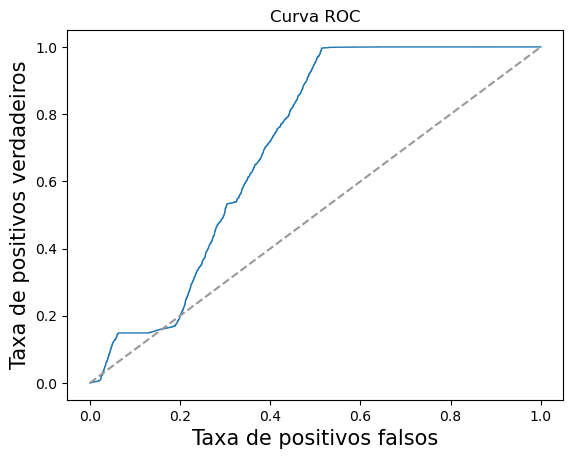

In [61]:
OCSVM_best.fit(X_train)
Y_predicted = OCSVM_best.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [62]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 2070  2191]
 [   44 12267]]


### Algoritmo supervisionado 2 - Árvore de Decisão

In [63]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

    anormais       0.96      0.89      0.92      4261
     normais       0.96      0.99      0.97     12311

    accuracy                           0.96     16572
   macro avg       0.96      0.94      0.95     16572
weighted avg       0.96      0.96      0.96     16572

Área sob a curva ROC: {:0.3f} 0.9397449969232995


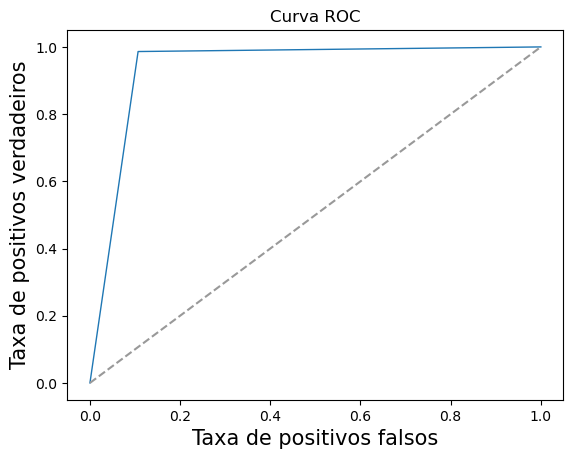

In [66]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, Y_dev)

Y_predicted = decision_tree.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)

cv_preds = decision_tree.predict(X_cv)
print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

dt_probs = decision_tree.predict_proba(X_eval)
fpr, tpr, _ = roc_curve(Y_eval, Y_predicted)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

In [67]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 3806   455]
 [  169 12142]]


## Conclusão

O algoritmo que apresentou o melhor resultado foi Árvore de Decisão com menos de 500 erros de falso positivo (erro do tipo 1, que nesse caso é a classe de interesse)

**Variáveis importantes:**

- Tempo entre cadastro e compra;
- Quantidade de IPs associados com um ID.

**Aumento expressivo no número de fraudes durante as primeiras semanas do ano.**

## Recomendações

- **Exigir nome completo e endereço de e-mail para cadastro de usuária ou usuário;**

- **Após a inscrição, apresentar imediatamente ofertas e descontos em potencial que funcionam tanto como campanha de marketing quanto para diminuir a velocidade entre o tempo de cadastro e compra, possibilitando a identificação mais fácil de robôs;**

- **Aumentar significativamente a segurança durante as três primeiras semanas do ano;**

- **Caso algum cliente seja identificado como fraude, pedir para responder perguntas de segurança ou CAPTCHAS.**